# 1. Install Dependencies

In [164]:
#!pip install neuralprophet

In [165]:
import pandas as pd 
import pickle 
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet

# 2. Process Data

### Below mostly is just exploring the data which involves understanding the data and fields we are working with.

In [166]:
csv_file_path = "./data/weatherAUS.csv"

In [167]:
df = pd.read_csv(csv_file_path)
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [168]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [169]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### From here on, we will focus on temperatures within melourne at 3 pm

In [170]:
melb_df = df[df["Location"] == "Melbourne"]
melb_df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No


In [171]:
melb_df["Date"] = pd.to_datetime(melb_df["Date"])
melb_df.dtypes

WARNING - (py.warnings._showwarnmsg) - /var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_8198/3752820838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

### Plot the already existing data to understand how it varies with time

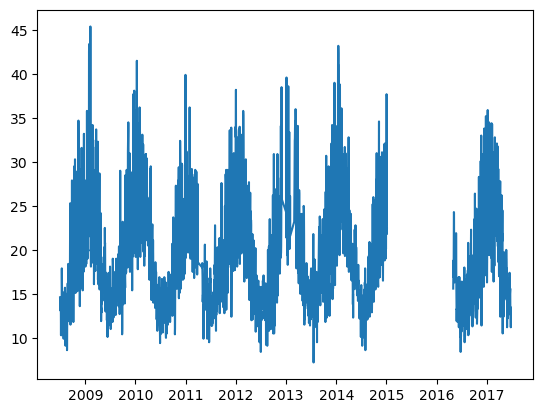

In [172]:
plt.plot(melb_df["Date"], melb_df["Temp3pm"])
plt.show()

### From the above plot, we figured out that between 2015 and mid 2016, we have missing data therefore we'll cut off the training data at 2015. We're also using the lambda function to create a new column called year so splitting the data using year becomes much easier

WARNING - (py.warnings._showwarnmsg) - /var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_8198/1799889411.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




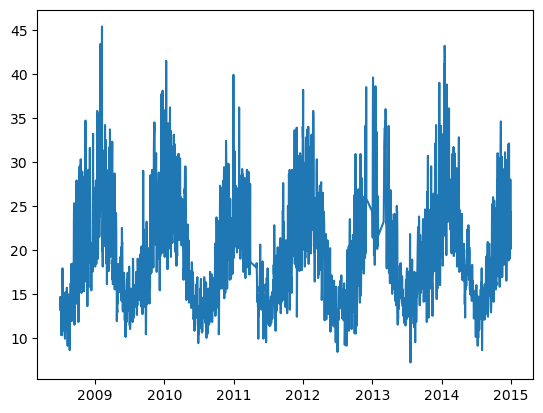

In [173]:
melb_df["Year"] = melb_df["Date"].apply(lambda x : x.year)
melb_df = melb_df[melb_df["Year"] < 2015]
plt.plot(melb_df["Date"], melb_df["Temp3pm"])
plt.show()

### Rewrite the data frame to only contain necessary information and drop all null rows

In [174]:
data = melb_df[["Date","Temp3pm"]]
data.dropna(inplace=True)
data.columns = ["ds", "y"]
data.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/cg/drwvcmcs4zb18rstmq029rkm0000gn/T/ipykernel_8198/163892601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


# 3. Train Model

In [175]:
model = NeuralProphet()

### freq='D' represents the data frames time series data being strutured in a day to day manner where each data is one day apart

In [ ]:
model.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.693% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (py.warnings._showwarnmsg) - /Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/abbazs/Projects/ML-Data-Science/enviroment_1/env/lib/python3.8/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues 

Training: 0it [00:00, ?it/s]

# 4. Forecast Using Model

### periods=900 predicts the temperature for the next 900 days since the datas cut off point. A sample data frame which is of similar structure to the data frame used for training is made and then fed into the model for prediction 

In [ ]:
future = model.make_future_dataframe(data, periods=900)
future

In [ ]:
forecast = model.predict(future)
forecast.head()

### Charts are plot using the in built plotting function in Neural Prophet

In [ ]:
model.plot(forecast)

In [ ]:
model.plot_components(forecast)

# 5. Save Model
### Model is saved using the in built function in Neural Prophet

In [ ]:
from neuralprophet import save, load
save(model, "aus_temp_forecast_model.np")

In [ ]:
reloaded_model = load("aus_temp_forecast_model.np")

In [ ]:
reloaded_model

### Reload the saved model and try and predict today's temperature in Melbourne at 3pm

In [ ]:
new_future = reloaded_model.make_future_dataframe(data, periods=12000)
new_forecast = reloaded_model.predict(new_future)

In [ ]:
new_forecast

In [ ]:
today = new_forecast[new_forecast["ds"] == pd.to_datetime("2025-01-26")]
today

In [ ]:
today["yhat1"]

### Today's temperature in Melbourne at 3pm is approximately 29.37344